# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random
import matplotlib.pylab as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# Using random choices function, range 1 to 7 (not included) with length = 10.
def rolling10():
    return random.choices(range(1,7), k = 10)

In [3]:
roll = rolling10()

#### 2.- Plot the results sorted by value.

<BarContainer object of 10 artists>

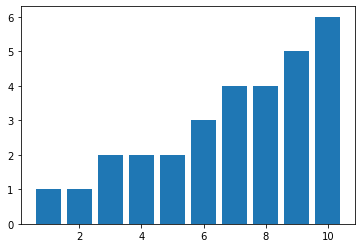

In [4]:
# Sorting the values on the list, and plotting in a bar graph.
roll.sort()
plt.bar(range(1,11),roll)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# Using numpy's unique with returning values
freq_roll = np.unique(roll, return_counts=True)

<BarContainer object of 6 artists>

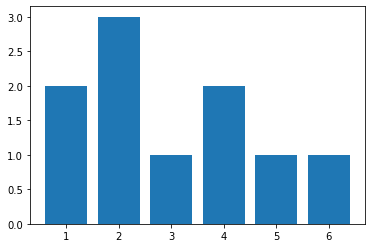

In [6]:
plt.bar(freq_roll[0], freq_roll[1])

In [7]:
"""
The x axis for the frequency plot is the y axis of first plot (the values of the rolls). 
The y axis for the frequency plot is the amount of bars in the first plot for each value, the frequency.
"""

'\nThe x axis for the frequency plot is the y axis of first plot (the values of the rolls). \nThe y axis for the frequency plot is the amount of bars in the first plot for each value, the frequency.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean_rolls(roll):
    return sum(roll)/len(roll)

In [9]:
mean_rolls(roll)

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
def mean_rolls2(roll):
    roll_freq = {}
    for i in roll:
        if i in roll_freq.keys():
            roll_freq[i] += 1
        else:
            roll_freq[i] = 1
   
    return  sum(k*v for k,v in roll_freq.items())/len(roll)
        

In [11]:
mean_rolls2(roll)

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
def median_roll(roll):
    roll.sort()
    if len(roll)%2 == 0:
        a = roll[int(len(roll)/2-1)]
        b = roll[int(len(roll)/2)]
        return (a+b)/2
    else:
        return roll[int(len(roll)/2-0.5)]

In [13]:
median_roll(roll)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [68]:
# First we check if our roll list is even or odd. If it is odd, I remove the central value
# When I have an even list, I split it into two sublists and calculate the median for those sublists, that will be
# the quartile 25 and 75

def get_quartiles(roll):
    roll.sort()
    if len(roll)%2 == 0:
        list1 = roll  
    else:
        list1 = roll[:int(len(roll)/2-0.5)] + roll[int(len(roll)/2+0.5):]  
        
    low_sublist = list1[:int(len(list1)/2)]
    high_sublist = list1[int(len(list1)/2):]
    q25 = median_roll(low_sublist)
    q75 = median_roll(high_sublist)              

    return q25, median_roll(roll), q75

In [69]:
get_quartiles(roll)

(2, 2.5, 4)

In [70]:
roll2 = [1, 1, 2, 2, 2, 3, 5, 5, 6, 6, 6]

In [71]:
get_quartiles(roll2)

(2, 3, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [76]:
# As the csv file has index, I indicate it to not generate a new column.
hundreds = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col = 0)
hundreds

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [98]:
hundreds.sort_values('value', inplace = True)
hundreds.reset_index(drop=True, inplace = True)

<BarContainer object of 100 artists>

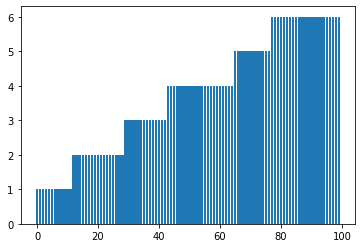

In [100]:
plt.bar(hundreds.index, hundreds['value'])

In [19]:
"""
We can see the distribution of a hundred rolls of a dice. According to the graph, the distribution is not uniform,
as we have many 4s and 6s and less 5s, which is the less apeared. There is also more 2s values than 1s and 3s.
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [101]:
# Applying 'mean_rolls' function to the 'value' column
mean_rolls(hundreds['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [104]:
freq_100rolls = np.unique(hundreds['value'], return_counts=True)
freq_100rolls

(array([1, 2, 3, 4, 5, 6]), array([12, 17, 14, 22, 12, 23]))

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

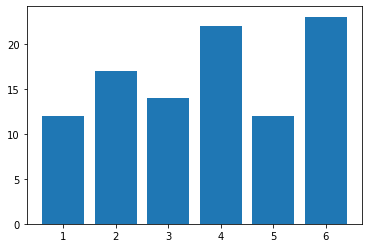

In [106]:
# your code here
plt.bar(freq_100rolls[0],freq_100rolls[1])

In [23]:
"""
As seen in the previous plots, 4s and 6s are the bigger bars, while 5s is the less. The columns for 1, 2 and 3 are 
lower than the 4, 5 and 6 and that's the reason for the mean to be bigger than 3.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [107]:
# your code here
thousands = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col = 0)
thousands


,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


In [108]:
freq_1000rolls = np.unique(thousands['value'], return_counts=True)

<BarContainer object of 6 artists>

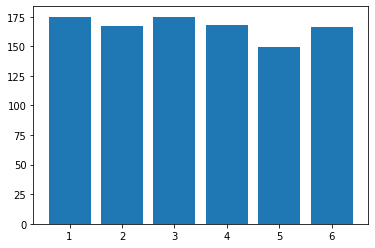

In [109]:
plt.bar(freq_1000rolls[0],freq_1000rolls[1])

In [25]:
"""
The values have been equilibrated. This is due to the same probability for each value in a dice. The more times 
we roll, the more equilibrated will be the results.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [112]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')

In [113]:
ages.head(5)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [114]:
freq_ages = np.unique(ages['observation'], return_counts=True)

<BarContainer object of 72 artists>

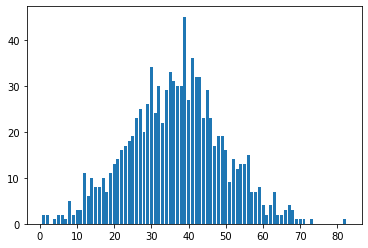

In [115]:
plt.bar(freq_ages[0],freq_ages[1])

In [ ]:
"""Looking at the plot it seems the mean will be around in the range 38-42 and I would say the standard deviation
will be around 10-12 years"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [118]:
# your code here
ages['observation'].mean()

36.56

In [119]:
ages['observation'].std()

12.81649962597677

In [28]:
"""
The exact values are a litlle bit out of the ranges I guessed, but not so much. However, I would say that the mean
would be bigger than the one calculated.
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [120]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')

In [121]:
ages2.head(5)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [122]:
freq_ages2 = np.unique(ages2['observation'], return_counts=True)

<BarContainer object of 18 artists>

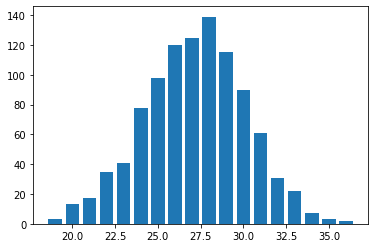

In [123]:
plt.bar(freq_ages2[0],freq_ages2[1])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [30]:
"""
The range of ages has been widely reduced, but the distribution is very similar.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [127]:
# your code here
ages2['observation'].mean()

27.155

In [128]:
ages2['observation'].std()

2.9698139326891835

In [32]:
"""
The mean is lower as the range of ages is reduced and moved down. The standard deviation is very low, that could
indicates that ages2 is a sample of a very specific group of population.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [129]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')

In [130]:
ages3.head(5)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [134]:
freq_ages3 = np.unique(ages3['observation'], return_counts=True)

<BarContainer object of 75 artists>

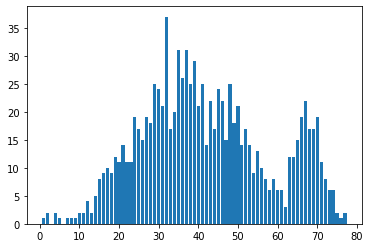

In [136]:
plt.bar(freq_ages3[0],freq_ages3[1])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [132]:
# your code here
ages3['observation'].mean()

41.989

In [133]:
ages3['observation'].std()

16.14470595986593

In [35]:
"""
As we can see in the plot, there is a specific group of old ages that augmented. This affects to the mean increasing
it and it also increases the standard deviation, as this group is quite far from the mean.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [140]:
# your code here
ages3['observation'].quantile([0, .25, .5, .75, 1])


0.00     1.0
0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64

In [37]:
"""
The median is 40 while the mean is almost 42. The explanation for that difference is that the difference between the
values over the median and the median itself is bigger than the difference between the values under the median and
the median itself.

We also can see that the upper range is 37 years while the lower range is 39. However, the mean is bigger than the 
median. and the quantile 0.25 is nearer to the median thant the quantile 0.75. Again, this shows that the values of
the upper range are mostly situaded near the maximum. And this is what is shown in plot, with a specific group in
range 63-72 with more values than expected if our sample was normally distributed.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [141]:
# Calculating percentiles between 0.75 and 1 to check
ages3['observation'].quantile([.75, .8, .85, .9, .95, 1])

0.75    53.0
0.80    57.0
0.85    64.0
0.90    67.0
0.95    70.0
1.00    77.0
Name: observation, dtype: float64

In [39]:
"""
With the new percentiles we can check that for the last quartile (.75 to 1) we have 10% between range 64-70.
That means that for a global range of 24 years (from 53 to 77), 40% of observations are in a range of 6 years,
which is the 25% of the range.
So, data is highly concentrated in this range.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [40]:
# your code here

In [41]:
"""
your comments here
"""

'\nyour comments here\n'